In [1]:
#importing all the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [3]:
#importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/supragyabajpai/SchulichJourney_DataScience/main/Assignment_3(Linear%20Regression)/kc_house_data.csv")

In [4]:
# the number of rows and columns
df.shape

(21613, 21)

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [9]:
# convert to datetime
df['date'] = pd.to_datetime(df['date'])

# Convert 'bathrooms' and 'floors' columns to int data type
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  int32         
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  int32         
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [11]:
df_copy = df.copy()

In [12]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


In [43]:
df.head()

# you can extract month, as part of feature eng!

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


price, sqft_living, sft_lot, sftlot15 are not distributed equally

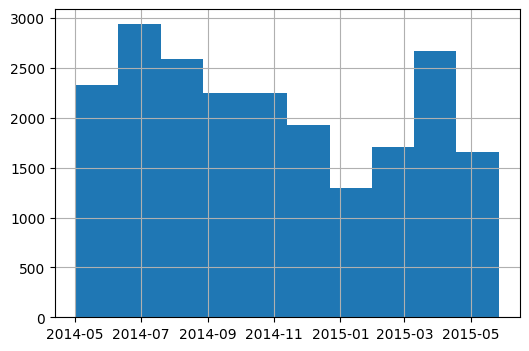

In [18]:
df['date'].hist(figsize = (6,4))
plt.show()

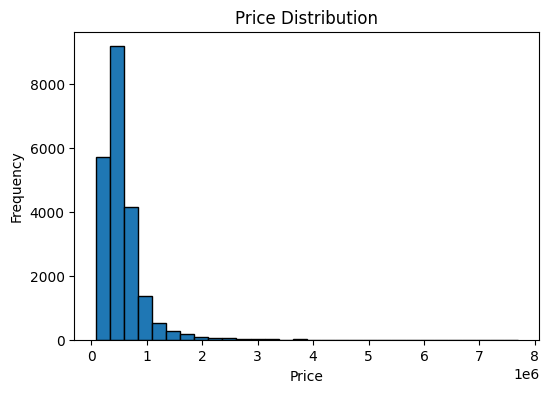

In [37]:
# Plotting the histogram of the price column
plt.figure(figsize=(6, 4))
plt.hist(df['price'], bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

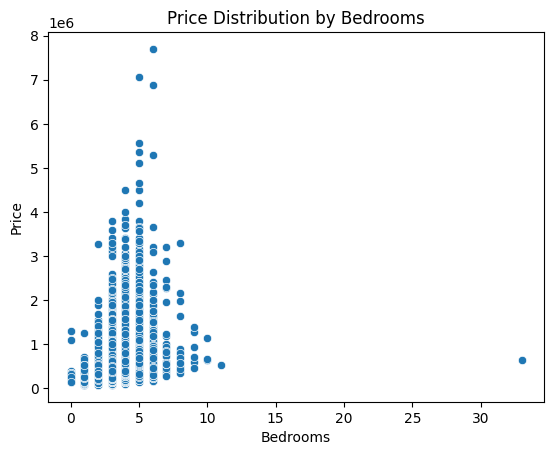

In [40]:
sns.scatterplot(data = df,x='bedrooms', y='price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bedrooms')

plt.show()

# 33 bedrooms is an outlier



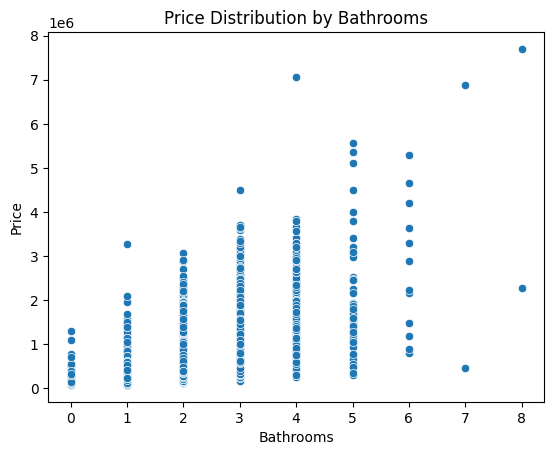

In [70]:
# Create a box plot
sns.scatterplot(data = df,x='bathrooms', y='price')
# Set labels and title
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bathrooms')

# Display the plot
plt.show()

#check for the house with  bathrooms and then see whats the grade

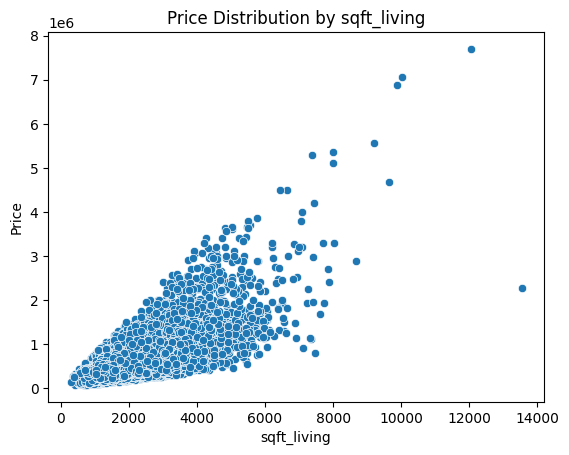

In [54]:
# Create a box plot
sns.scatterplot(data = df,x='sqft_living', y='price')
# Set labels and title
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('Price Distribution by sqft_living')

# Display the plot
plt.show()

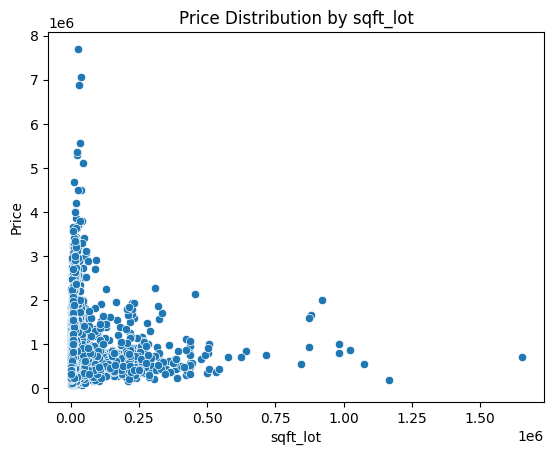

In [55]:
# Create a box plot
sns.scatterplot(data = df,x='sqft_lot', y='price')
# Set labels and title
plt.xlabel('sqft_lot')
plt.ylabel('Price')
plt.title('Price Distribution by sqft_lot')

# Display the plot
plt.show()

# check for the oulier, compare the zipcode, see for similar zipcode values.


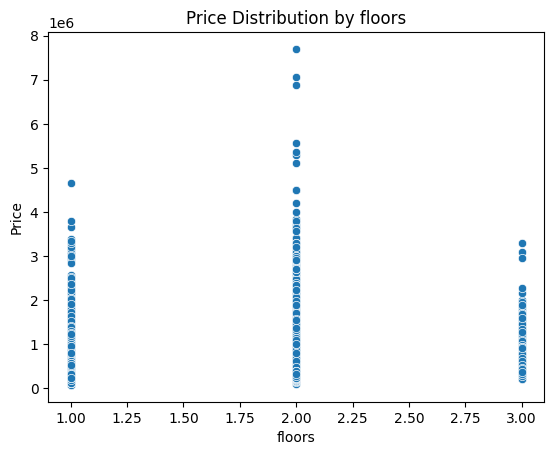

In [58]:
# Create a box plot
sns.scatterplot(data = df,x='floors', y='price')
# Set labels and title
plt.xlabel('floors')
plt.ylabel('Price')
plt.title('Price Distribution by floors')

# Display the plot
plt.show()

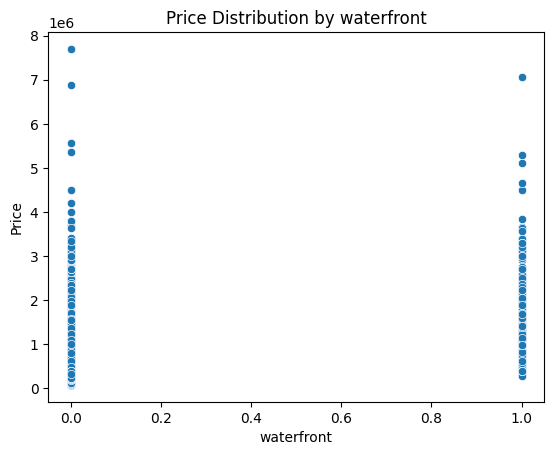

In [59]:
# Create a box plot
sns.scatterplot(data = df,x='waterfront', y='price')
# Set labels and title
plt.xlabel('waterfront')
plt.ylabel('Price')
plt.title('Price Distribution by waterfront')

# Display the plot
plt.show()

Check the count also

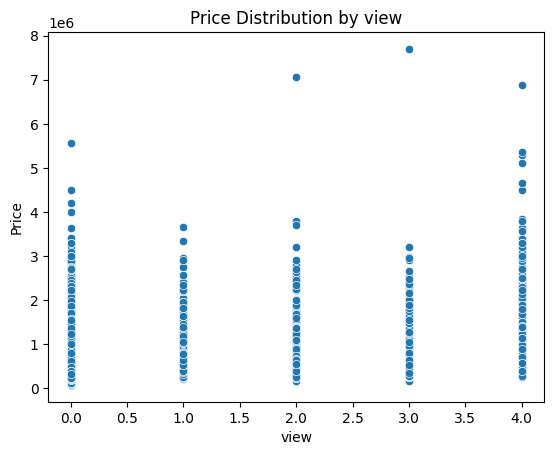

In [60]:
# Create a box plot
sns.scatterplot(data = df,x='view', y='price')
# Set labels and title
plt.xlabel('view')
plt.ylabel('Price')
plt.title('Price Distribution by view')

# Display the plot
plt.show()


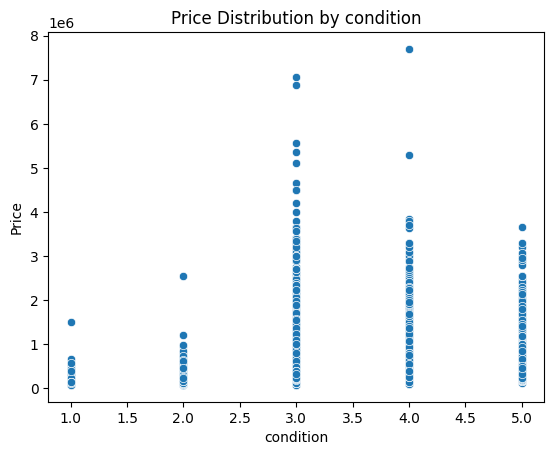

In [61]:
# Create a box plot
sns.scatterplot(data = df,x='condition', y='price')
# Set labels and title
plt.xlabel('condition')
plt.ylabel('Price')
plt.title('Price Distribution by condition')

# Display the plot
plt.show()

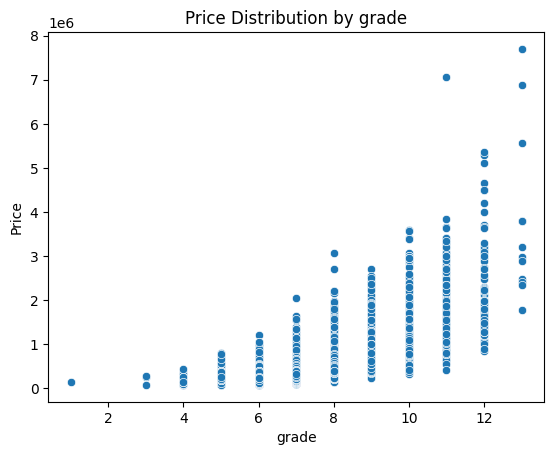

In [62]:
# Create a box plot
sns.scatterplot(data = df,x='grade', y='price')
# Set labels and title
plt.xlabel('grade')
plt.ylabel('Price')
plt.title('Price Distribution by grade')

# Display the plot
plt.show()

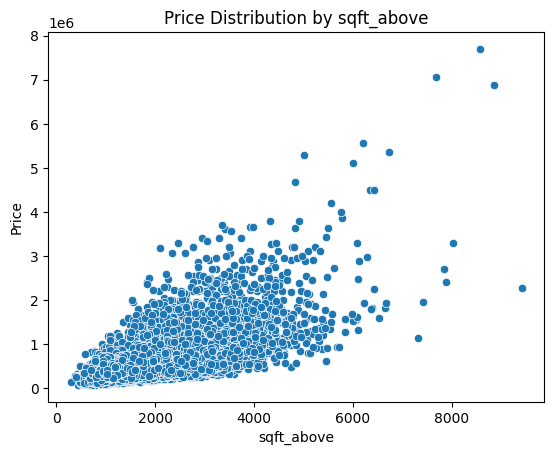

In [63]:
# Create a box plot
sns.scatterplot(data = df,x='sqft_above', y='price')
# Set labels and title
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.title('Price Distribution by sqft_above')

# Display the plot
plt.show()

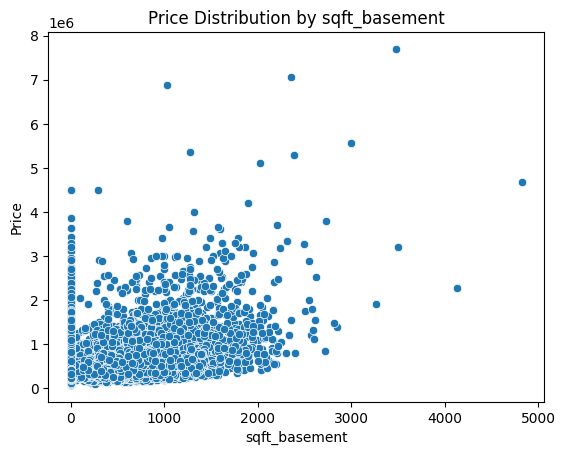

In [64]:
# Create a box plot
sns.scatterplot(data = df,x='sqft_basement', y='price')
# Set labels and title
plt.xlabel('sqft_basement')
plt.ylabel('Price')
plt.title('Price Distribution by sqft_basement')

# Display the plot
plt.show()

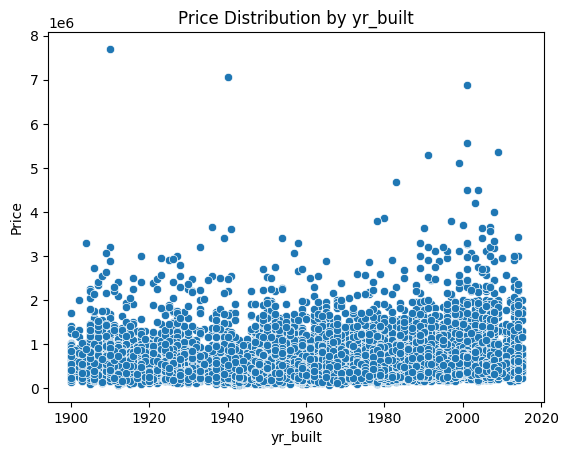

In [65]:
# Create a box plot
sns.scatterplot(data = df,x='yr_built', y='price')
# Set labels and title
plt.xlabel('yr_built')
plt.ylabel('Price')
plt.title('Price Distribution by yr_built')

# Display the plot
plt.show()

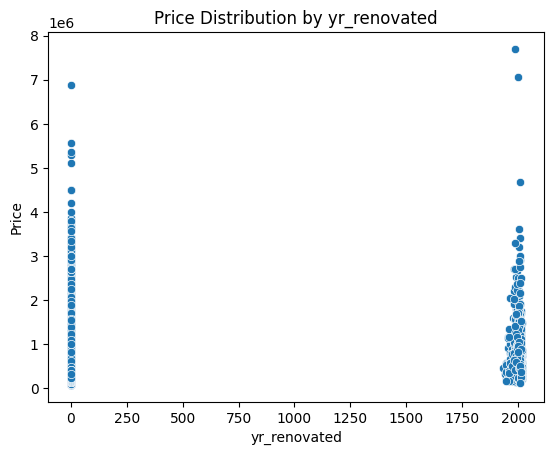

In [66]:
# Create a box plot
sns.scatterplot(data = df,x='yr_renovated', y='price')
# Set labels and title
plt.xlabel('yr_renovated')
plt.ylabel('Price')
plt.title('Price Distribution by yr_renovated')

# Display the plot
plt.show()

<Axes: >

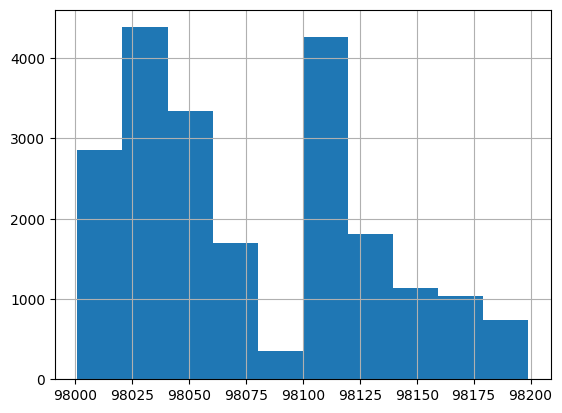

In [69]:
df["zipcode"].hist()

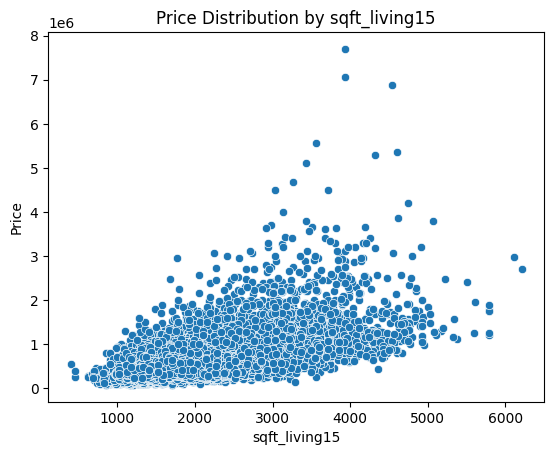

In [67]:
# Create a box plot
sns.scatterplot(data = df,x='sqft_living15', y='price')
# Set labels and title
plt.xlabel('sqft_living15')
plt.ylabel('Price')
plt.title('Price Distribution by sqft_living15')

# Display the plot
plt.show()

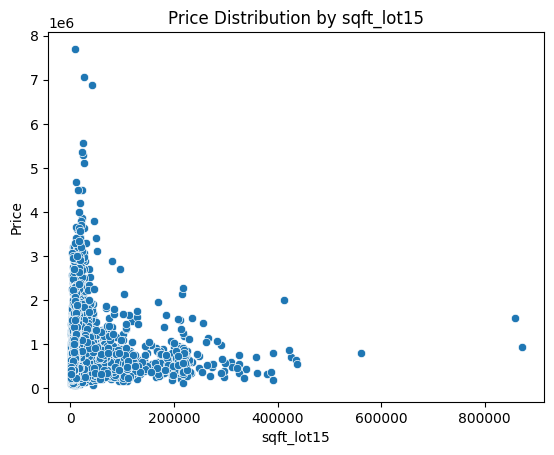

In [68]:
# Create a box plot
sns.scatterplot(data = df,x='sqft_lot15', y='price')
# Set labels and title
plt.xlabel('sqft_lot15')
plt.ylabel('Price')
plt.title('Price Distribution by sqft_lot15')

# Display the plot
plt.show()

<Axes: xlabel='lat', ylabel='long'>

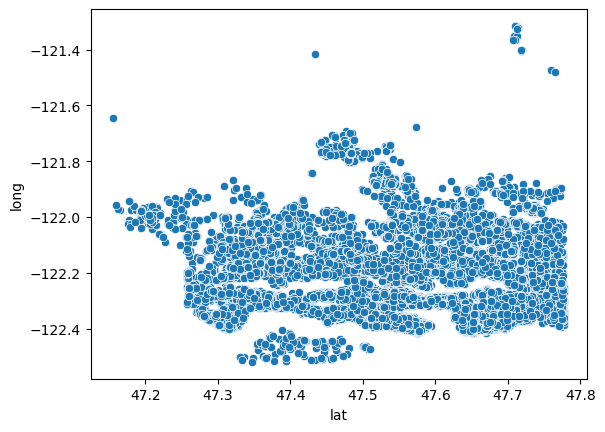

In [14]:
#use scatterplot to see if there is any outlier or missing values for longtitude and latitude
sns.scatterplot(data = df, x = "lat", y = "long")

feature eng:
   - drop the columns like ID
   - new columns: 
                  -age of house, 
                  -price per sqft, 
                  -renovated or not(boolean), 
                  -month of built

PCA: 0.9 significance vale
